In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sym
from sympy.utilities.lambdify import lambdify

## Esercizio 1

Si consideri il polinomio $$L(x)=(1/2) (5x^3-3x)$$ $x \in [-1,1]$

Si visualizzi il grafico del polinomio in [-1,1]

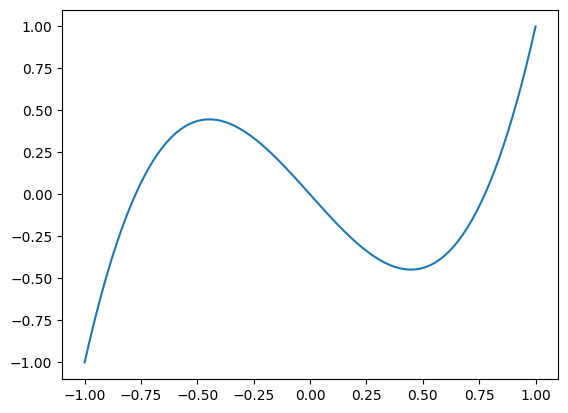

In [42]:
xx = np.linspace(-1, 1, 100)
Lx = lambda x: (1/2)*(5*x**3-3*x)
yy = [Lx(xi) for xi in xx]
plt.plot(xx, yy)

- Si implementi il metodo di Newton per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

In [43]:
tolx=1e-12
tolf=1e-12
nmax=40

In [44]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
    """
    Implementa il metodo di Newton per il calcolo degli zeri di un'equazione non lineare.

    Parametri:
    fname: La funzione di cui si vuole calcolare lo zero.
    fpname: La derivata prima della funzione di  cui si vuole calcolare lo zero.
    x0: iterato iniziale
    tolx: La tolleranza di errore tra due iterati successivi
    tolf: tolleranza sul valore della funzione
    nmax: numero massimo di iterazione

    Restituisce:
    Lo zero approssimato della funzione, il numero di iterazioni e la lista degli iterati intermedi.
    """
    xk=[]
    fx0=fname(x0)
    if abs(fpname(x0)) < np.spacing(1):
        print("derivata prima nulla in x0")
        return None, None,None

    d= -fx0/fpname(x0)
    x1= x0 + d

    fx1=fname(x1)
    xk.append(x1)
    it=1

    while it < nmax and abs(d) >= tolx * abs(x0) and abs(fx1) >= tolf:
        x0 = x1
        fx0 = fx1
        if abs(fpname(x0)) < np.spacing(1): #Se la derivata prima e' pià piccola della precisione di macchina stop
            print(" derivata prima nulla in x0")
            return None, None,None
        d = -fx0/fpname(x0)
        x1 = x0 + d
        fx1=fname(x1)
        it=it+1
        xk.append(x1)

    if it==nmax:
        print('raggiunto massimo numero di iterazioni \n')

    return x1,it,xk

In [45]:
Lpx = lambda x: (1/2)*(15*x**2-3)
x0=-1
x_newton, it_newton, xk_newton = newton(Lx, Lpx, x0, tolx, tolf, nmax)
print("iterazioni newton:", it_newton)
print("soluzione newton:", x_newton)
print("L(x):", Lx(x_newton))

iterazioni newton: 5
soluzione newton: -0.7745966692414835
L(x): -4.440892098500626e-16


- Si implementi il metodo di Bisezione per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

In [46]:
def metodo_bisezione(fname, a, b, tolx,tolf):
    """
    Implementa il metodo di bisezione per il calcolo degli zeri di un'equazione non lineare.

    Parametri:
    f: La funzione da cui si vuole calcolare lo zero.
    a: L'estremo sinistro dell'intervallo di ricerca.
    b: L'estremo destro dell'intervallo di ricerca.
    tol: La tolleranza di errore.

    Restituisce:
    Lo zero approssimato della funzione, il numero di iterazioni e la lista di valori intermedi.
    """
    fa=fname(a)
    fb=fname(b)
    if fb * fa > 0:
        print("Non è possibile applicare il metodo di bisezione \n")
        return None, None,None

    it = 0
    v_xk = []

    maxit = math.ceil(math.log((b - a) / tolx) / math.log(2))-1
    fxk = 1

    while it < maxit and abs(fxk) >= tolf:
        xk = a + (b - a) / 2
        v_xk.append(xk)
        it += 1
        fxk=fname(xk)

        if fxk==0:
            return xk, it, v_xk

        if np.sign(fa) * np.sign(fxk) < 0:
            b = xk
            fb = fxk
        elif np.sign(fxk) * np.sign(fb) < 0:
            a = xk
            fa = fxk

    return xk, it, v_xk

- Si utilizzi il metodo di Newton con iterato iniziale $x_0=1$ per determinare lo zero $x^*$ piu' vicino ad 1. [**Punti 2**]

In [47]:
Lpx = lambda x: (1/2)*(15*x**2-3)
x0=1
x_newton, it_newton, xk_newton = newton(Lx, Lpx, x0, tolx, tolf, nmax)
print("iterazioni newton:", it_newton)
print("soluzione newton:", x_newton)
print("L(x):", Lx(x_newton))

x_start = x_newton

iterazioni newton: 5
soluzione newton: 0.7745966692414835
L(x): 4.440892098500626e-16


Si consideri la funzione $q(x)=L(x)/(x-x^*)$ dove $x^*$ è lo zero calcolato nel punto precedente. Si applichi il metodo di Newton con iterato iniziale $x_0=-0.5$ per calcolare uno zero della funzione $q(x)$  e si verifichi che è anche zero di $L(x)$  [**Punti 2**]

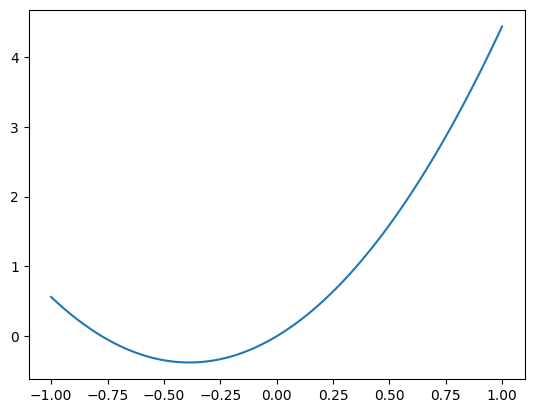

In [49]:
x = sym.symbols('x')
q = (1/2)*(5*x**3-3*x)/(x - x_start)
dqs=sym.diff(q,x,1)

qx = lambdify(x, q, np)
qpx = lambdify(x,dqs,np)

yy = [qx(xi) for xi in xx]
plt.plot(xx, yy)

In [ ]:
x0 = -0.5
x_newton, it_newton, xk_newton = newton(qx, qpx, x0, tolx, tolf, nmax)
print("iterazioni newton:", it_newton)
print("soluzione newton:", x_newton)
print("Q(x):", qx(x_newton))
print("L(x):", Lx(x_newton))

iterazioni newton: 6
soluzione newton: -0.7745966692414833
Q(x): -1.4332917616497522e-16
L(x): 2.220446049250313e-16


Si applichi il metodo di bisezione alle funzioni $q(x)$ ed $L(x)$ definite in [-1,1] e si fornisca una spiegazione teorica dei risultati ottenuti  [**Punti 2**]

In [ ]:
a = -1
b = 1
x_bi, it_bi, xk_bi = metodo_bisezione(Lx, a, b, tolx, tolf)
print("iterazioni bisezione:", it_bi)
print("soluzione bisezione:", x_bi)
print("L(x):", Lx(x_bi))

iterazioni bisezione: 1
soluzione bisezione: 0.0
L(x): 0.0


In [50]:
a = -1
b = 1
x_bi, it_bi, xk_bi = metodo_bisezione(qx, a, b, tolx, tolf)
print("iterazioni bisezione:", it_bi)
print("soluzione bisezione:", x_bi)

Non è possibile applicare il metodo di bisezione 

iterazioni bisezione: None
soluzione bisezione: None


> il metodo della bisezione non può essere applicato alla funzione qx nell'intervallo [-1, 1] perché pur essendo convessa, i punti rappresentati i due estremi sono entrambi > 0

                                                                                                                Punti [14]